In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial,sqrt,pi
np.random.seed(42)

In [8]:
import numpy as np
p = 0.3
n_samples = 10000
bern = np.random.binomial(1,p,size = n_samples)
print("Bernoulli sample mean (approx p):",bern.mean())
print("Bernoulli sample var (approx p):",bern.var())

Bernoulli sample mean (approx p): 0.2887
Bernoulli sample var (approx p): 0.20535231000000004


In [9]:
#Normal Continuous sample
mu,sigma = 2.0,1.5
norm_samples = np.random.normal(mu,sigma,size=n_samples)
print("Normal sample mean (approx mu):",norm_samples.mean())
print("Normal sample var (approx mu):",norm_samples.var())

Normal sample mean (approx mu): 2.0185330937808708
Normal sample var (approx mu): 2.2487603282724753


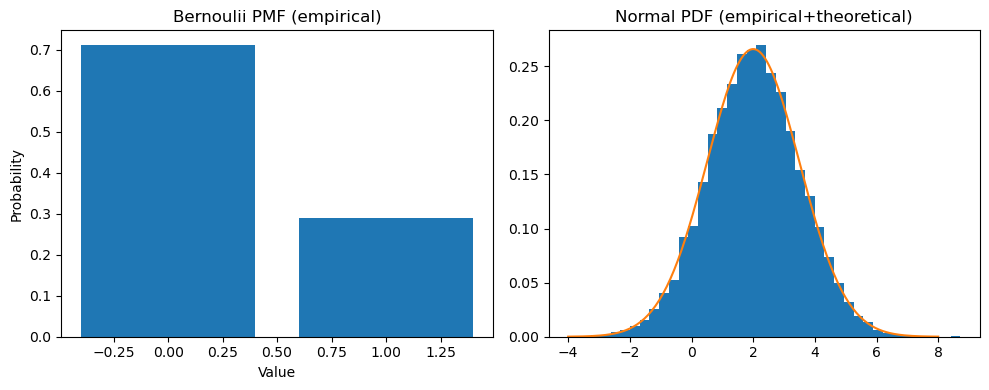

In [11]:
#Plot PDFs/PMFs
fig,axes = plt.subplots(1,2,figsize=(10,4))
#Vernoulii PMF
vals, counts = np.unique(bern, return_counts=True)
axes[0].bar(vals,counts/len(bern))
axes[0].set_title("Bernoulii PMF (empirical)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability")
axes[1].hist(norm_samples, bins=40, density=True)
x=np.linspace(mu-4*sigma,mu+4*sigma,200)
axes[1].plot(x, stats.norm.pdf(x,mu,sigma))
axes[1].set_title("Normal PDF (empirical+theoretical)")
plt.tight_layout()
plt.show()

# 2. Common District Distribution

### Examples: Binomial, Poisson --- theoretical PMF and sampling

## <font color="green"> Binomial Example<font>

In [3]:
n, p = 10, 0.4
k = np.arange(0, n+1)
pmf_binom = stats.binom.pmf(k,n,p)

print(stats.binom.mean(n,p), stats.binom.var(n,p))

4.0 2.4


## <font color="green"> Poisson Example<font>

In [7]:
lam = 3.0
k_p = np.arange(0,15)
pmf_pois = stats.poisson.pmf(k_p,lam)
print(stats.poisson.mean(lam), stats.poisson.var(lam))

3.0 3.0


## <font color="green">Plot PMFs<font>

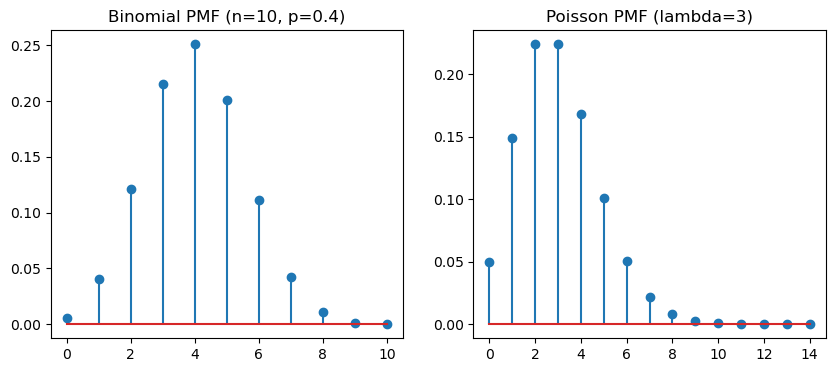

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].stem(k,pmf_binom)
ax[0].set_title("Binomial PMF (n=10, p=0.4)")
ax[1].stem(k_p,pmf_pois)
ax[1].set_title("Poisson PMF (lambda=3)")
#plt.tight_layout()
plt.show()


# 3)

## <font color="green">Uniform<font>

In [11]:
a,b = 0,5
uni_samps = np.random.uniform(a,b,size=10000)
x=np.linspace(a,b,200)

## <font color="green">Exponential<font>

In [12]:
lam = 1.2
exp_samps = np.random.exponential(1/lam, size=10000)
x_exp = np.linspace(0,8,200)

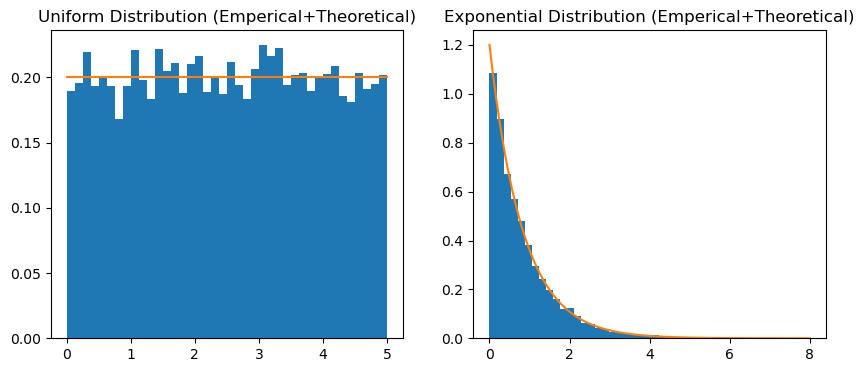

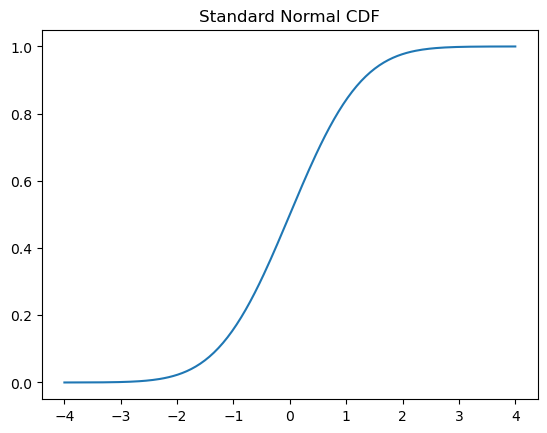

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(uni_samps,bins=40,density=True)
ax[0].plot(x,stats.uniform.pdf(x,a,b-a))
ax[0].set_title("Uniform Distribution (Emperical+Theoretical)")

ax[1].hist(exp_samps,bins=40,density=True)
ax[1].plot(x_exp,stats.expon.pdf(x_exp,scale=1/lam))
ax[1].set_title("Exponential Distribution (Emperical+Theoretical)")
#plt.tight_layout()
plt.show()

# Normal Shown Previously: We can show standard normal CDF Example
xs = np.linspace(-4,4,200)
plt.plot(xs,stats.norm.cdf(xs))
plt.title('Standard Normal CDF')
plt.show()


# 4. Multiple Random Variables 

### Joint, marginal, covariance, and correlational examples.

Empirical Covariance: 0.5963741772522293
Empirical Correlation: 0.5976180913170929


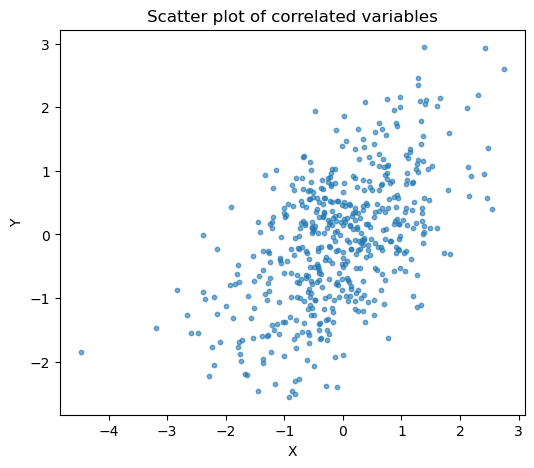

In [22]:
# Simulate correlated variables using covariance matrix
mean = [0,0]
cov = [[1.0,0.6],[0.6,1.0]]
samples = np.random.multivariate_normal(mean,cov,size=5000)
x = samples[:,0]
y = samples[:,1]

print("Empirical Covariance:",np.cov(x,y)[0,1])
print("Empirical Correlation:",np.corrcoef(x,y)[0,1])

#Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(x[:500],y[:500],s=10, alpha=0.6)
plt.title("Scatter plot of correlated variables")
plt.xlabel("X");plt.ylabel("Y")
plt.show()

# 5. Central Limit Theorem (CLT)
### Simulate sample means from an exponential distribution and observe convergence to normality

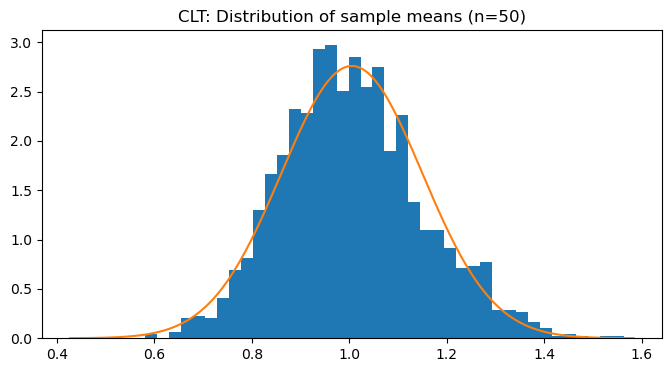

Sample means mean: 1.0053396428399866 std: 0.14460389344417532


In [23]:
#CLT demonstration
pop = np.random.exponential(scale=1.0, size=200000)
sample_size = 50
n_trials = 2000
means = [np.mean(np.random.choice(pop, sample_size)) for _ in range(n_trials)]

plt.figure(figsize=(8,4))
plt.hist(means,bins=40,density=True)

mu_hat = np.mean(means)
sigma_hat = np.std(means)

x=np.linspace(mu_hat-4*sigma_hat,mu_hat+4*sigma_hat,200)
plt.plot(x,stats.norm.pdf(x,mu_hat,sigma_hat))
plt.title(f"CLT: Distribution of sample means (n={sample_size})")
plt.show()

print("Sample means mean:",mu_hat,"std:",sigma_hat)